# Clock Data Extraction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import re
import csv
import glob
import matplotlib.pyplot as plt


In [3]:
# Define the regex pattern
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}),\d+ - \[INFO::DC::ExLogger\] - DC:(.*?): (.*)'

# Compile the regex pattern
regex = re.compile(pattern)

# List of log files
log_files = glob.glob("/content/drive/MyDrive/Alarm_Recomendation_System/log_files/android.android.deskclock*.log")

# Function to extract messages from log files
def extract_messages(log_file):
    messages = []
    with open(log_file, 'r') as file:
        log_data = file.readlines()
        for line in log_data:
            match = regex.search(line)
            if match:
                timestamp, module, message = match.groups()
                messages.append({'Timestamp': timestamp, 'Module': module, 'Message': message})
    return messages

# Extract messages from each log file
all_messages = []
for log_file in log_files:
    all_messages.extend(extract_messages(log_file))

# Save messages to CSV file
csv_file = 'extracted_messages_log.csv'
with open(csv_file, 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['Timestamp', 'Module', 'Message'])
    writer.writeheader()
    writer.writerows(all_messages)

df = pd.read_csv('extracted_messages_log.csv')

# Define a regex pattern to match 'Cancel snooze alarm' messages
pattern = r'^Cancel snooze alarm'

# Apply the regex pattern to the 'Message' column and modify the matching messages
df.loc[df['Message'].str.contains(pattern, regex=True), 'Message'] = 'Cancel snooze alarm'


# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Drop duplicates based on 'Message' and 'DateTime'
df.drop_duplicates(subset=['Message', 'Timestamp'], inplace=True)

# Reset index if needed
df.reset_index(drop=True, inplace=True)

# Extract date and time into separate columns
df['Date'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time

# Drop the original 'Timestamp' column if no longer needed
df.drop(columns=['Timestamp'], inplace=True)

# Reorder the columns
df = df[['Date', 'Time', 'Module', 'Message']]


# Save the modified DataFrame to a new CSV file
df.to_csv('extracted_messages_log.csv', sep=',', index=False)


print(f'Successfully saved extracted messages to {csv_file}')


Successfully saved extracted messages to extracted_messages_log.csv


In [4]:
df

,Date,Time,Module,Message
0,2024-01-05,14:45:33,AlarmHelper,setStatusBarIcon: true
1,2024-01-05,14:45:33,ShutdownAlarm,Set Shutdown Alarm. System will boot at 2024-0...
2,2024-01-05,14:45:33,Test,Set Shutdown Alarm Success.
3,2024-01-05,14:45:33,AlarmHelper,setZenMode
4,2024-01-05,14:47:06,AlarmInitReceiver,receive action: android.intent.action.TIME_SET
...,...,...,...,...
35909,2024-03-15,07:10:05,AlarmAlertFullScreenActivity,AlarmAlertFullScreenActivity onWindowFocusChan...
35910,2024-03-15,07:10:05,AlarmAlertFullScreenActivity,"notifyPowerState, isEnter: false"
35911,2024-03-15,07:10:05,AlarmAlertFullScreenActivity,AlarmAlertFullScreenActivity#onDestroy start
35912,2024-03-15,09:51:40,RingtoneHelper,updateRingtone start


In [5]:
# Read the CSV file with tab-separated values
data = pd.read_csv('extracted_messages_log.csv')

# Display the DataFrame to verify the data
data


,Date,Time,Module,Message
0,2024-01-05,14:45:33,AlarmHelper,setStatusBarIcon: true
1,2024-01-05,14:45:33,ShutdownAlarm,Set Shutdown Alarm. System will boot at 2024-0...
2,2024-01-05,14:45:33,Test,Set Shutdown Alarm Success.
3,2024-01-05,14:45:33,AlarmHelper,setZenMode
4,2024-01-05,14:47:06,AlarmInitReceiver,receive action: android.intent.action.TIME_SET
...,...,...,...,...
35909,2024-03-15,07:10:05,AlarmAlertFullScreenActivity,AlarmAlertFullScreenActivity onWindowFocusChan...
35910,2024-03-15,07:10:05,AlarmAlertFullScreenActivity,"notifyPowerState, isEnter: false"
35911,2024-03-15,07:10:05,AlarmAlertFullScreenActivity,AlarmAlertFullScreenActivity#onDestroy start
35912,2024-03-15,09:51:40,RingtoneHelper,updateRingtone start


In [6]:
# Check for missing values
print(data.isnull().sum())

# Convert 'Date' and 'Time' columns to datetime format
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

data


Date       0
Time       0
Module     0
Message    0
dtype: int64


,Date,Time,Module,Message,DateTime
0,2024-01-05,14:45:33,AlarmHelper,setStatusBarIcon: true,2024-01-05 14:45:33
1,2024-01-05,14:45:33,ShutdownAlarm,Set Shutdown Alarm. System will boot at 2024-0...,2024-01-05 14:45:33
2,2024-01-05,14:45:33,Test,Set Shutdown Alarm Success.,2024-01-05 14:45:33
3,2024-01-05,14:45:33,AlarmHelper,setZenMode,2024-01-05 14:45:33
4,2024-01-05,14:47:06,AlarmInitReceiver,receive action: android.intent.action.TIME_SET,2024-01-05 14:47:06
...,...,...,...,...,...
35909,2024-03-15,07:10:05,AlarmAlertFullScreenActivity,AlarmAlertFullScreenActivity onWindowFocusChan...,2024-03-15 07:10:05
35910,2024-03-15,07:10:05,AlarmAlertFullScreenActivity,"notifyPowerState, isEnter: false",2024-03-15 07:10:05
35911,2024-03-15,07:10:05,AlarmAlertFullScreenActivity,AlarmAlertFullScreenActivity#onDestroy start,2024-03-15 07:10:05
35912,2024-03-15,09:51:40,RingtoneHelper,updateRingtone start,2024-03-15 09:51:40


In [7]:
# Distribution of events by module
module_counts = data['Module'].value_counts()
print(module_counts)

# Trends over time
daily_events = data.groupby(data['DateTime'].dt.date).size()
print(daily_events)

# Most frequent messages or actions
top_messages = data['Message'].value_counts().head(10)
print(top_messages)


AlarmHelper                     10973
AlarmAlertFullScreenActivity     6894
AlarmService                     4140
NotificationUtil                 3599
ShutdownAlarm                    2688
Test                             2614
AlarmInitReceiver                2511
AlarmKlaxon                      1025
AlarmReceiver                     879
DefaultPlaybackDelegate           340
RingtoneHelper                    219
AlarmClockFragment                 29
TimerDao                            2
TimerPlaybackDelegate               1
Name: Module, dtype: int64
DateTime
2008-12-31     14
2009-01-01      5
2018-10-27     10
2021-01-08     19
2021-01-19      9
             ... 
2024-03-11     50
2024-03-12    105
2024-03-13     48
2024-03-14    107
2024-03-15    103
Length: 344, dtype: int64
clearAlarmArrivingNotification                                                     2821
clearAlarmArrivingAlarm                                                            2766
setStatusBarIcon: true          

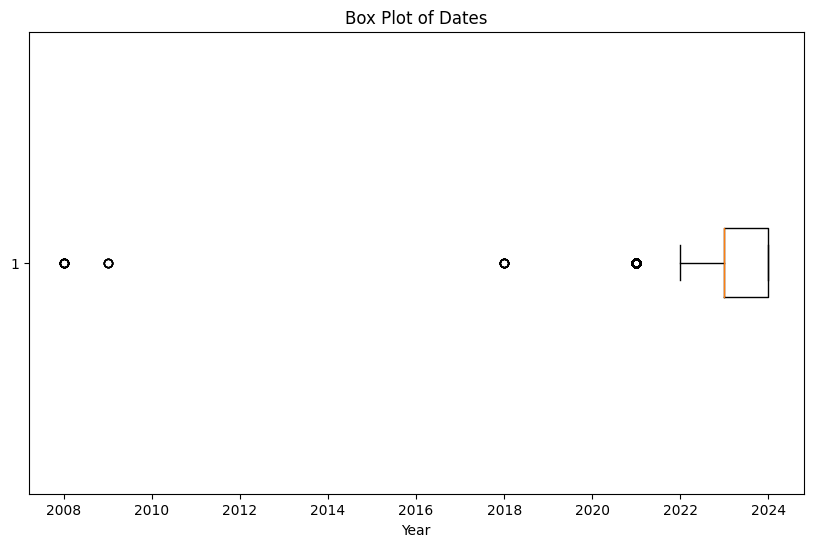

In [8]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create a box plot for the 'Date' column
plt.figure(figsize=(10, 6))
plt.boxplot(data['Date'].dt.year, vert=False)
plt.xlabel('Year')
plt.title('Box Plot of Dates')
plt.show()

In [9]:
# Drop rows with outlier dates
outlier_dates = ['2008-12-31', '2009-01-01', '2018-10-27' ]
data.drop(data[data['Date'].isin(outlier_dates)].index, inplace=True)



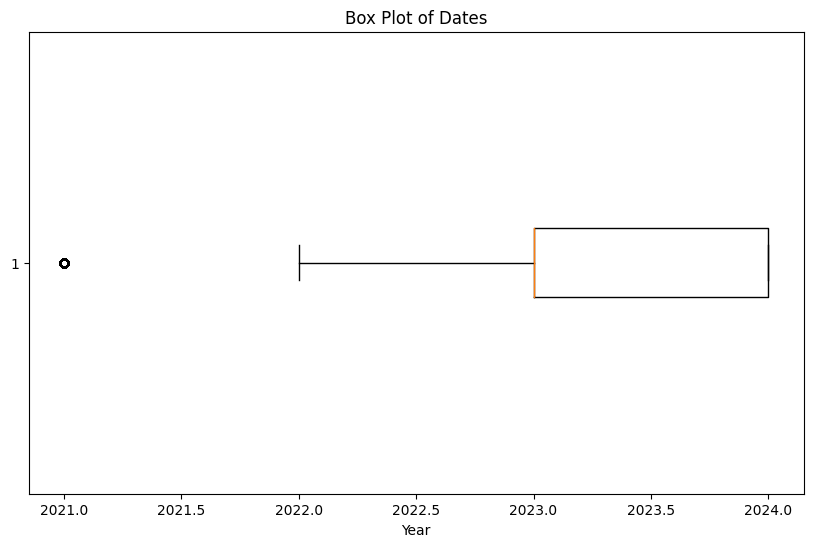

In [10]:
# Create a box plot for the 'Date' column
plt.figure(figsize=(10, 6))
plt.boxplot(data['Date'].dt.year, vert=False)
plt.xlabel('Year')
plt.title('Box Plot of Dates')
plt.show()

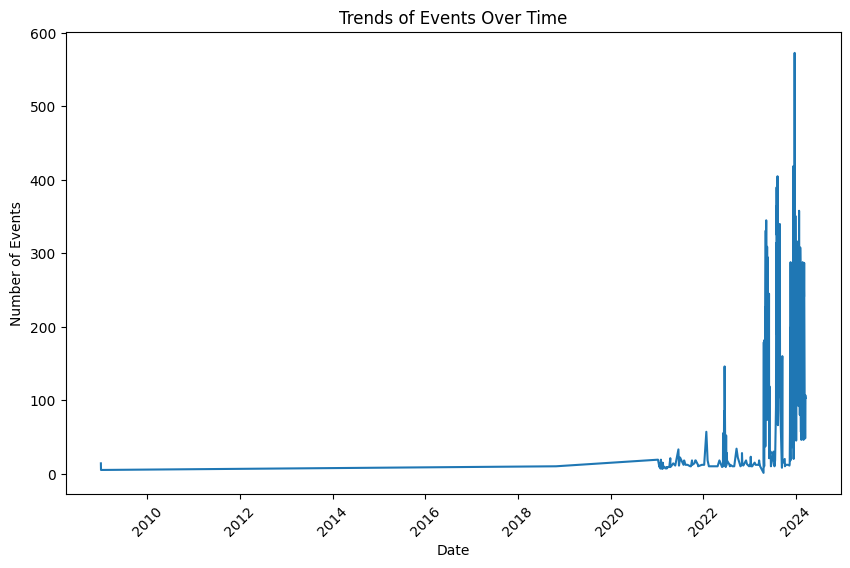

In [11]:
# Plot trends over time
daily_events.plot(kind='line', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.title('Trends of Events Over Time')
plt.xticks(rotation=45)
plt.show()



In [12]:
top_messages

clearAlarmArrivingNotification                                                     2821
clearAlarmArrivingAlarm                                                            2766
setStatusBarIcon: true                                                             2683
Set Shutdown Alarm Success.                                                        2614
setZenMode                                                                         2088
receive action: android.intent.action.TIME_SET                                     2070
AlarmAlertFullScreenActivity onWindowFocusChanged toggleScreenButtonState() end     987
AlarmAlertFullScreenActivity onWindowFocusChanged                                   986
notifyPowerState, isEnter: false                                                    732
AlarmAlertFullScreenActivity#onDestroy start                                        651
Name: Message, dtype: int64

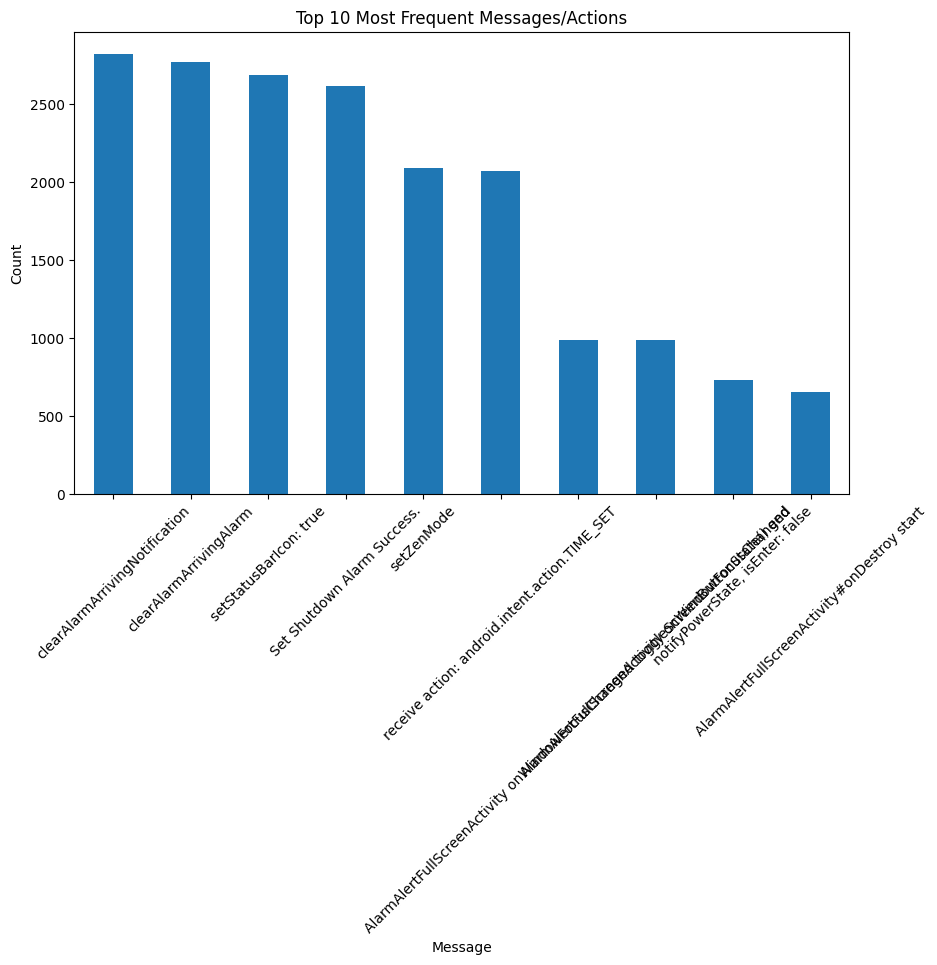

In [13]:
# Plot most frequent messages or actions
top_messages.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Message')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Messages/Actions')
plt.xticks(rotation=45)
plt.show()

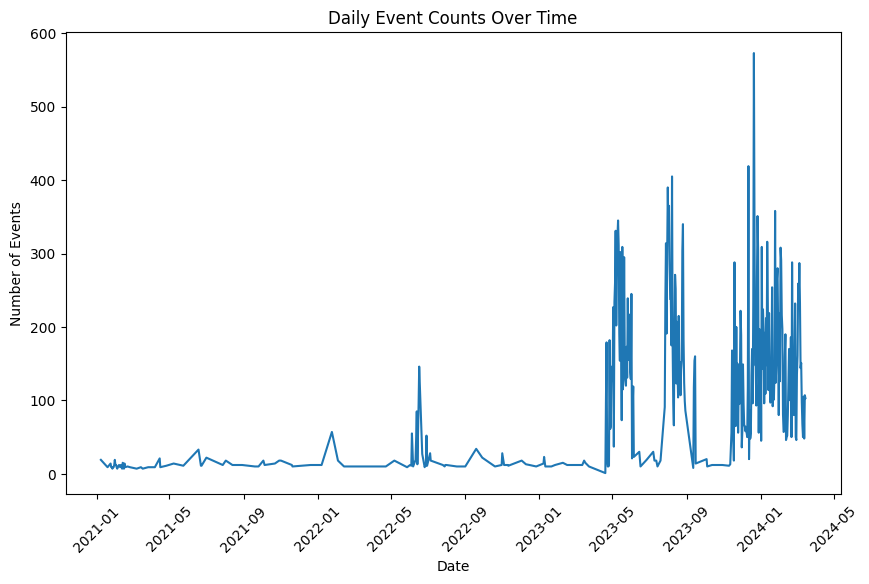

In [14]:
# Extract day of the week and hour from DateTime
data['DayOfWeek'] = data['DateTime'].dt.day_name()
data['Hour'] = data['DateTime'].dt.hour

# Plot daily and hourly event counts
daily_counts = data.groupby(data['DateTime'].dt.date).size()
hourly_counts = data.groupby('Hour').size()

daily_counts.plot(kind='line', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.title('Daily Event Counts Over Time')
plt.xticks(rotation=45)
plt.show()




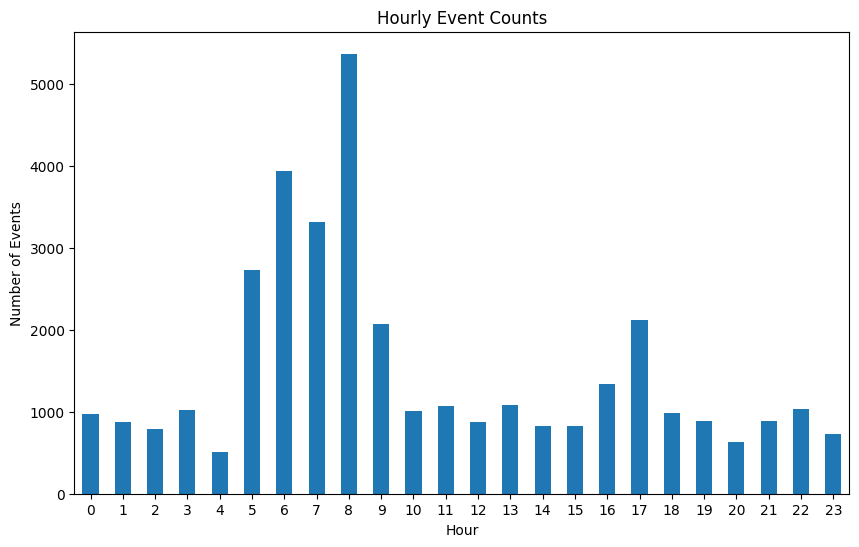

In [15]:
hourly_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Hour')
plt.ylabel('Number of Events')
plt.title('Hourly Event Counts')
plt.xticks(rotation=0)
plt.show()

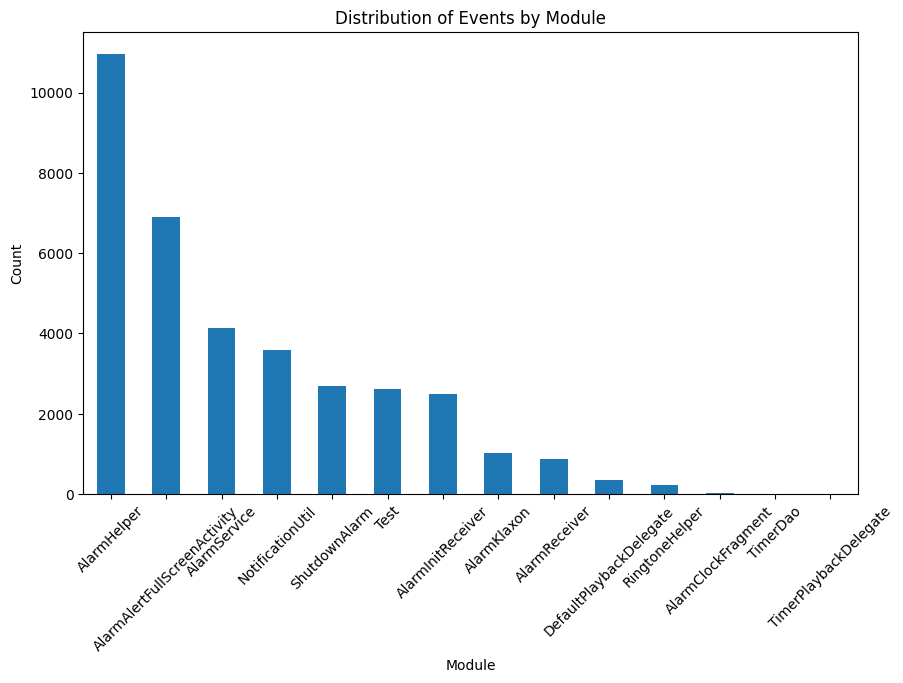

In [16]:
# Plot distribution of events by module
module_counts = data['Module'].value_counts()
module_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Module')
plt.ylabel('Count')
plt.title('Distribution of Events by Module')
plt.xticks(rotation=45)
plt.show()


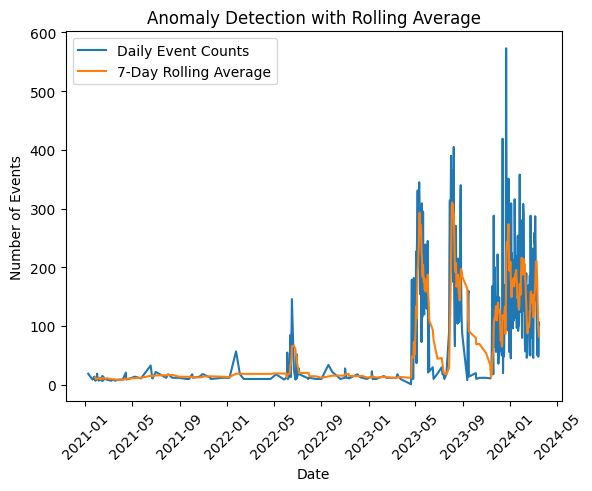

In [17]:
# Example: Anomaly detection using rolling average
rolling_mean = daily_counts.rolling(window=7).mean()  # 7-day rolling average
plt.plot(daily_counts.index, daily_counts, label='Daily Event Counts')
plt.plot(rolling_mean.index, rolling_mean, label='7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.title('Anomaly Detection with Rolling Average')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [18]:
# Drop the original 'Timestamp' column if no longer needed
data.drop(columns=['Hour'], inplace=True)

# Convert Date, Time, and DateTime columns to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time']).dt.time
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract features
data['TimeOfDay'] = pd.cut(data['Time'].apply(lambda x: x.hour),
                            bins=[0, 4, 11, 16, 19, 23],
                            labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Night'],
                            right=False,
                           ordered=False) # Set ordered=False for duplicate labels


In [19]:
data

,Date,Time,Module,Message,DateTime,DayOfWeek,TimeOfDay
0,2024-01-05,14:45:33,AlarmHelper,setStatusBarIcon: true,2024-01-05 14:45:33,Friday,Afternoon
1,2024-01-05,14:45:33,ShutdownAlarm,Set Shutdown Alarm. System will boot at 2024-0...,2024-01-05 14:45:33,Friday,Afternoon
2,2024-01-05,14:45:33,Test,Set Shutdown Alarm Success.,2024-01-05 14:45:33,Friday,Afternoon
3,2024-01-05,14:45:33,AlarmHelper,setZenMode,2024-01-05 14:45:33,Friday,Afternoon
4,2024-01-05,14:47:06,AlarmInitReceiver,receive action: android.intent.action.TIME_SET,2024-01-05 14:47:06,Friday,Afternoon
...,...,...,...,...,...,...,...
35909,2024-03-15,07:10:05,AlarmAlertFullScreenActivity,AlarmAlertFullScreenActivity onWindowFocusChan...,2024-03-15 07:10:05,Friday,Morning
35910,2024-03-15,07:10:05,AlarmAlertFullScreenActivity,"notifyPowerState, isEnter: false",2024-03-15 07:10:05,Friday,Morning
35911,2024-03-15,07:10:05,AlarmAlertFullScreenActivity,AlarmAlertFullScreenActivity#onDestroy start,2024-03-15 07:10:05,Friday,Morning
35912,2024-03-15,09:51:40,RingtoneHelper,updateRingtone start,2024-03-15 09:51:40,Friday,Morning


In [20]:
# Calculate frequency of alarm activations, snooze actions, and alarm dismissals
alarm_activations_freq = data[data['Message'].str.contains('onStartCommand triggered')].groupby('Date').size()
snooze_actions_freq = data[data['Message'].str.contains('snooze with physical key pressed|dismiss/snooze alarm/timer with timeout|User manually snoozed')].groupby('Date').size()
alarm_dismissals_freq = data[data['Message'].str.contains('Alarm dismissed')].groupby('Date').size()

In [21]:
print(alarm_activations_freq)
print('#######################################')
print(snooze_actions_freq)
print('#######################################')
print(alarm_dismissals_freq)
print("#######################################")

Date
2023-04-22    2
2023-04-27    3
2023-04-28    1
2023-04-29    1
2023-04-30    1
             ..
2024-03-11    1
2024-03-12    2
2024-03-13    1
2024-03-14    1
2024-03-15    2
Length: 183, dtype: int64
#######################################
Date
2023-04-22    1
2023-04-27    1
2023-05-05    2
2023-05-06    4
2023-05-07    3
             ..
2024-02-27    1
2024-03-02    1
2024-03-05    1
2024-03-08    1
2024-03-15    1
Length: 62, dtype: int64
#######################################
Date
2023-04-22    1
2023-04-27    2
2023-04-28    1
2023-04-29    1
2023-04-30    1
             ..
2024-03-11    1
2024-03-12    2
2024-03-13    1
2024-03-14    1
2024-03-15    1
Length: 175, dtype: int64
#######################################


In [22]:
# Filter rows based on specified messages
trigger_messages = ['onStartCommand triggered']
snooze_messages = ['snooze with physical key pressed', 'dismiss/snooze alarm/timer with timeout', 'User manually snoozed']
dismiss_messages = ['Alarm dismissed', 'dismiss alarm from Notification', 'Cancel snooze alarm']

trigger_rows = data[data['Message'].isin(trigger_messages)]
snooze_rows = data[data['Message'].isin(snooze_messages)]
dismiss_rows = data[data['Message'].isin(dismiss_messages)]

# Concatenate the filtered rows
data = pd.concat([trigger_rows, snooze_rows, dismiss_rows])

In [23]:
df = data

df

,Date,Time,Module,Message,DateTime,DayOfWeek,TimeOfDay
131,2024-01-06,08:30:00,AlarmService,onStartCommand triggered,2024-01-06 08:30:00,Saturday,Morning
293,2024-01-07,08:30:00,AlarmService,onStartCommand triggered,2024-01-07 08:30:00,Sunday,Morning
373,2024-01-08,08:30:00,AlarmService,onStartCommand triggered,2024-01-08 08:30:00,Monday,Morning
689,2024-01-10,08:30:00,AlarmService,onStartCommand triggered,2024-01-10 08:30:00,Wednesday,Morning
885,2024-01-11,08:30:00,AlarmService,onStartCommand triggered,2024-01-11 08:30:00,Thursday,Morning
...,...,...,...,...,...,...,...
35595,2024-03-12,05:00:03,AlarmAlertFullScreenActivity,Alarm dismissed,2024-03-12 05:00:03,Tuesday,Morning
35648,2024-03-12,06:00:05,AlarmAlertFullScreenActivity,Alarm dismissed,2024-03-12 06:00:05,Tuesday,Morning
35704,2024-03-13,07:00:05,AlarmAlertFullScreenActivity,Alarm dismissed,2024-03-13 07:00:05,Wednesday,Morning
35753,2024-03-14,07:00:05,AlarmAlertFullScreenActivity,Alarm dismissed,2024-03-14 07:00:05,Thursday,Morning


In [24]:
# Drop the row with DateTime value
df = df[df['DateTime'] != '2023-06-06 08:30:00']
df = df[df['DateTime'] != '2023-07-30 14:53:30']

# Define the DateTime values to be changed
datetime_values_to_change = [
    '2023-08-19 07:10:00',
    '2024-01-01 09:40:00',
    '2023-05-06 07:30:00'
]

# Drop the 'Message' column based on DateTime values
df.loc[df['DateTime'].isin(datetime_values_to_change), 'Message'] = 'Alarm dismissed'

In [25]:
# Convert the 'Timestamp' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Distribution of events by module
module_counts = df['Module'].value_counts()
print(module_counts)

# Trends over time
daily_events = df.groupby(df['DateTime'].dt.date).size()
print(daily_events)

# Most frequent messages or actions
top_messages = df['Message'].value_counts().head(10)
print(top_messages)

AlarmService                    415
AlarmAlertFullScreenActivity    258
AlarmReceiver                     9
Name: Module, dtype: int64
DateTime
2023-04-22    4
2023-04-27    6
2023-04-28    2
2023-04-29    2
2023-04-30    2
             ..
2024-03-11    2
2024-03-12    4
2024-03-13    2
2024-03-14    2
2024-03-15    4
Length: 182, dtype: int64
onStartCommand triggered                   339
Alarm dismissed                            230
dismiss/snooze alarm/timer with timeout     67
snooze with physical key pressed            18
User manually snoozed                       13
Cancel snooze alarm                          9
dismiss alarm from Notification              6
Name: Message, dtype: int64


In [26]:
# Drop the 'Module' column
df.drop(columns=['Module'], inplace=True)

# Rename messages in the 'Message' column
message_mapping = {
    'onStartCommand triggered': 'Triggered',
    'snooze with physical key pressed': 'Snooze',
    'dismiss/snooze alarm/timer with timeout': 'Snooze',
    'User manually snoozed': 'Snooze',
    'Alarm dismissed' : 'Alarm dismissed',
    'dismiss alarm from Notification' : 'Alarm dismissed',
    'Cancel snooze alarm' : 'Alarm dismissed'
}
df['Message'] = df['Message'].map(message_mapping)



In [27]:
# Sort DataFrame by 'DateTime' column in ascending order
df = df.sort_values(by='DateTime')

# Reset index if needed
df.reset_index(drop=True, inplace=True)

In [28]:
df

,Date,Time,Message,DateTime,DayOfWeek,TimeOfDay
0,2023-04-22,09:30:01,Triggered,2023-04-22 09:30:01,Saturday,Morning
1,2023-04-22,09:40:01,Snooze,2023-04-22 09:40:01,Saturday,Morning
2,2023-04-22,09:50:00,Triggered,2023-04-22 09:50:00,Saturday,Morning
3,2023-04-22,09:50:12,Alarm dismissed,2023-04-22 09:50:12,Saturday,Morning
4,2023-04-27,05:40:00,Triggered,2023-04-27 05:40:00,Thursday,Morning
...,...,...,...,...,...,...
677,2024-03-14,07:00:05,Alarm dismissed,2024-03-14 07:00:05,Thursday,Morning
678,2024-03-15,07:00:18,Triggered,2024-03-15 07:00:18,Friday,Morning
679,2024-03-15,07:00:30,Snooze,2024-03-15 07:00:30,Friday,Morning
680,2024-03-15,07:10:00,Triggered,2024-03-15 07:10:00,Friday,Morning


In [29]:
# Initialize the unique_id column with zeros
df['unique_id'] = 0

# Initialize the id counter
id_counter = 1

# Iterate over the DataFrame rows
for index, row in df.iterrows():
    if row['Message'] == 'Alarm dismissed':
        df.loc[index, 'unique_id'] = id_counter
        id_counter += 1

# Initialize a variable to keep track of the increment value
increment_value = 1

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    if row['unique_id'] == 0:
        df.loc[index, 'unique_id'] = increment_value
    elif row['unique_id'] == increment_value:
        increment_value += 1

    # Break the loop once the increment value reaches 227
    if increment_value == 300:
        break

In [30]:
# Reorder the columns
df = df[['unique_id', 'DateTime', 'Date', 'Time', 'Message', 'DayOfWeek', 'TimeOfDay']]

In [31]:
df

,unique_id,DateTime,Date,Time,Message,DayOfWeek,TimeOfDay
0,1,2023-04-22 09:30:01,2023-04-22,09:30:01,Triggered,Saturday,Morning
1,1,2023-04-22 09:40:01,2023-04-22,09:40:01,Snooze,Saturday,Morning
2,1,2023-04-22 09:50:00,2023-04-22,09:50:00,Triggered,Saturday,Morning
3,1,2023-04-22 09:50:12,2023-04-22,09:50:12,Alarm dismissed,Saturday,Morning
4,2,2023-04-27 05:40:00,2023-04-27,05:40:00,Triggered,Thursday,Morning
...,...,...,...,...,...,...,...
677,244,2024-03-14 07:00:05,2024-03-14,07:00:05,Alarm dismissed,Thursday,Morning
678,245,2024-03-15 07:00:18,2024-03-15,07:00:18,Triggered,Friday,Morning
679,245,2024-03-15 07:00:30,2024-03-15,07:00:30,Snooze,Friday,Morning
680,245,2024-03-15 07:10:00,2024-03-15,07:10:00,Triggered,Friday,Morning


In [32]:
# Calculate snooze and dismissed counts for each unique_id
grouped_data = df.groupby('unique_id')['Message'].value_counts().unstack(fill_value=0)
grouped_data.reset_index(inplace=True)

# Calculate snooze ratio and alarm dismissed ratio
grouped_data['Snooze_Ratio'] = grouped_data['Snooze'] / (grouped_data['Triggered'] + grouped_data['Alarm dismissed'] + grouped_data['Snooze'] )
grouped_data['AlarmDismissed_Ratio'] = grouped_data['Alarm dismissed'] / (grouped_data['Triggered'] + grouped_data['Alarm dismissed'] + grouped_data['Snooze'] )

# Check the column names in grouped_data DataFrame
print(grouped_data.columns)

# Correct the column names in the merge statement
df = pd.merge(df, grouped_data[['unique_id', 'Snooze_Ratio', 'AlarmDismissed_Ratio']], on='unique_id', how='left')


# Display the updated DataFrame
df

Index(['unique_id', 'Alarm dismissed', 'Snooze', 'Triggered', 'Snooze_Ratio',
       'AlarmDismissed_Ratio'],
      dtype='object', name='Message')


,unique_id,DateTime,Date,Time,Message,DayOfWeek,TimeOfDay,Snooze_Ratio,AlarmDismissed_Ratio
0,1,2023-04-22 09:30:01,2023-04-22,09:30:01,Triggered,Saturday,Morning,0.25,0.25
1,1,2023-04-22 09:40:01,2023-04-22,09:40:01,Snooze,Saturday,Morning,0.25,0.25
2,1,2023-04-22 09:50:00,2023-04-22,09:50:00,Triggered,Saturday,Morning,0.25,0.25
3,1,2023-04-22 09:50:12,2023-04-22,09:50:12,Alarm dismissed,Saturday,Morning,0.25,0.25
4,2,2023-04-27 05:40:00,2023-04-27,05:40:00,Triggered,Thursday,Morning,0.25,0.25
...,...,...,...,...,...,...,...,...,...
677,244,2024-03-14 07:00:05,2024-03-14,07:00:05,Alarm dismissed,Thursday,Morning,0.00,0.50
678,245,2024-03-15 07:00:18,2024-03-15,07:00:18,Triggered,Friday,Morning,0.25,0.25
679,245,2024-03-15 07:00:30,2024-03-15,07:00:30,Snooze,Friday,Morning,0.25,0.25
680,245,2024-03-15 07:10:00,2024-03-15,07:10:00,Triggered,Friday,Morning,0.25,0.25


In [33]:
# Calculate dismissal and snooze rates
dismissal_counts = df[df['Message'] == 'Alarm dismissed'].groupby('unique_id').size()
snooze_counts = df[df['Message'] == 'Snooze'].groupby('unique_id').size()
total_counts = df.groupby('unique_id').size()

dismissal_rates = dismissal_counts / total_counts
snooze_rates = snooze_counts / total_counts


In [34]:
# Fill null (NaN) values in snooze_rates with 0
snooze_rates.fillna(0, inplace=True)

In [35]:
# Time series analysis
df['Date'] = df['DateTime'].dt.date
daily_counts = df.groupby(['unique_id', 'Date']).size().unstack(fill_value=0)

# Define custom function to modify daily counts
def modify_count(count):
    if count % 2 == 0:
        return count // 2
    else:
        return (count // 2) + 1

# Apply the custom function to modify the daily counts
daily_counts = daily_counts.applymap(modify_count)

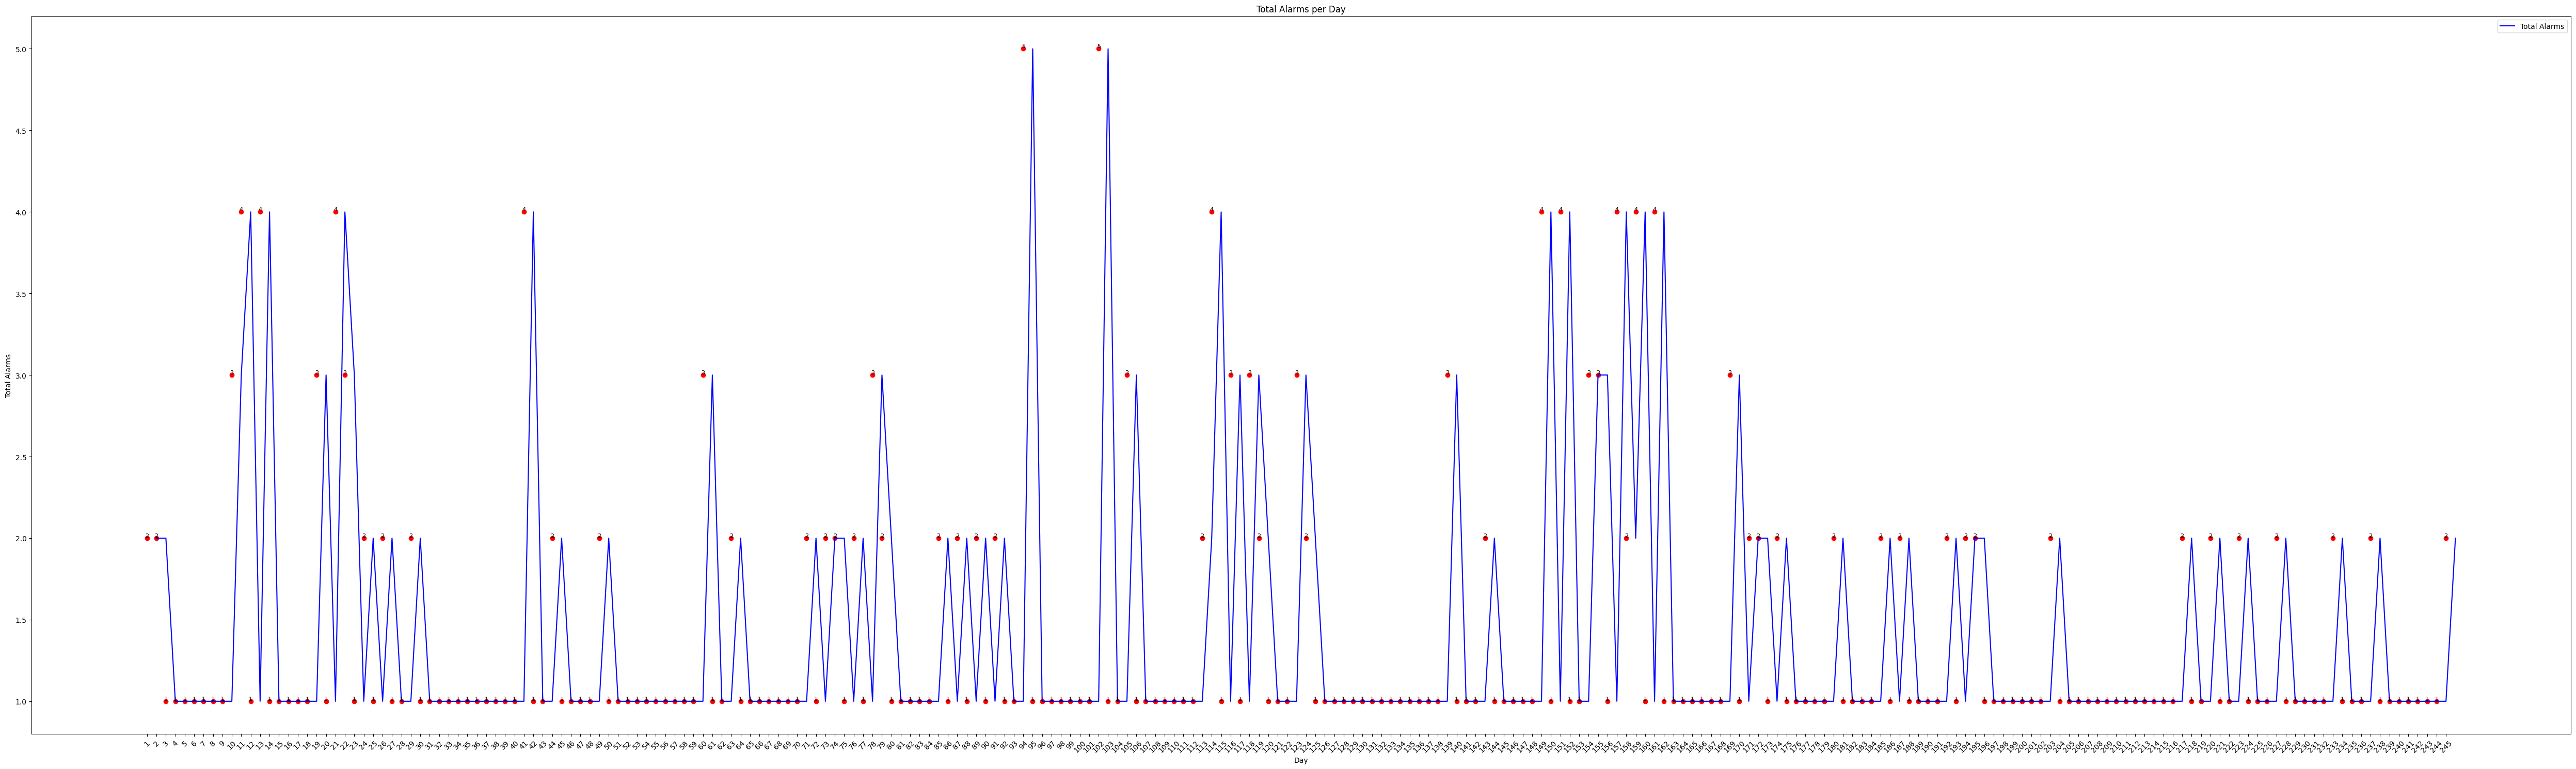

In [36]:
# Plot Total Alarms per Day
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed



# Plotting the data with a blue dashed line
plt.plot(daily_counts.sum(axis=1), color='blue', linestyle='solid', label='Total Alarms')

# Adding a legend
plt.legend()

plt.title('Total Alarms per Day')
plt.xlabel('Day')
plt.ylabel('Total Alarms')

# Customize x-axis ticks
plt.xticks(range(len(daily_counts.index)), daily_counts.index, rotation=45)

# Removing grid lines
plt.grid(False)

# Adding markers for emphasis
plt.scatter(range(len(daily_counts.index)), daily_counts.sum(axis=1), color='red', marker='o', label='Total Alarms')

# Adding annotations for specific points
for i, count in enumerate(daily_counts.sum(axis=1)):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)


# Show plot
plt.tight_layout()
plt.show()


In [37]:
df = df.sort_values(by=['unique_id', 'DateTime'])

# Calculate the duration for each 'unique_id' group
df['Duration'] = df.groupby('unique_id')['DateTime'].transform(lambda x: x.max() - x.min())

In [38]:
df

,unique_id,DateTime,Date,Time,Message,DayOfWeek,TimeOfDay,Snooze_Ratio,AlarmDismissed_Ratio,Duration
0,1,2023-04-22 09:30:01,2023-04-22,09:30:01,Triggered,Saturday,Morning,0.25,0.25,0 days 00:20:11
1,1,2023-04-22 09:40:01,2023-04-22,09:40:01,Snooze,Saturday,Morning,0.25,0.25,0 days 00:20:11
2,1,2023-04-22 09:50:00,2023-04-22,09:50:00,Triggered,Saturday,Morning,0.25,0.25,0 days 00:20:11
3,1,2023-04-22 09:50:12,2023-04-22,09:50:12,Alarm dismissed,Saturday,Morning,0.25,0.25,0 days 00:20:11
4,2,2023-04-27 05:40:00,2023-04-27,05:40:00,Triggered,Thursday,Morning,0.25,0.25,0 days 00:20:16
...,...,...,...,...,...,...,...,...,...,...
677,244,2024-03-14 07:00:05,2024-03-14,07:00:05,Alarm dismissed,Thursday,Morning,0.00,0.50,0 days 00:00:05
678,245,2024-03-15 07:00:18,2024-03-15,07:00:18,Triggered,Friday,Morning,0.25,0.25,0 days 00:09:47
679,245,2024-03-15 07:00:30,2024-03-15,07:00:30,Snooze,Friday,Morning,0.25,0.25,0 days 00:09:47
680,245,2024-03-15 07:10:00,2024-03-15,07:10:00,Triggered,Friday,Morning,0.25,0.25,0 days 00:09:47


In [39]:
df.dtypes

unique_id                         int64
DateTime                 datetime64[ns]
Date                             object
Time                             object
Message                          object
DayOfWeek                        object
TimeOfDay                      category
Snooze_Ratio                    float64
AlarmDismissed_Ratio            float64
Duration                timedelta64[ns]
dtype: object

In [40]:
# Function to remove "0 days" from Duration column
def remove_days(duration_timedelta):
    return str(duration_timedelta).split()[2]

# Apply the function to the Duration column
df['Duration'] = df['Duration'].apply(remove_days)

In [41]:
# Save the extracted data to a new CSV file
df.to_csv('final_Clock_data.csv', index=False)

# Model Building

In [42]:
!pip install scikit-learn==1.4.1.post1

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import joblib

In [44]:
data = pd.read_csv('final_Clock_data.csv')

data

,unique_id,DateTime,Date,Time,Message,DayOfWeek,TimeOfDay,Snooze_Ratio,AlarmDismissed_Ratio,Duration
0,1,2023-04-22 09:30:01,2023-04-22,09:30:01,Triggered,Saturday,Morning,0.25,0.25,00:20:11
1,1,2023-04-22 09:40:01,2023-04-22,09:40:01,Snooze,Saturday,Morning,0.25,0.25,00:20:11
2,1,2023-04-22 09:50:00,2023-04-22,09:50:00,Triggered,Saturday,Morning,0.25,0.25,00:20:11
3,1,2023-04-22 09:50:12,2023-04-22,09:50:12,Alarm dismissed,Saturday,Morning,0.25,0.25,00:20:11
4,2,2023-04-27 05:40:00,2023-04-27,05:40:00,Triggered,Thursday,Morning,0.25,0.25,00:20:16
...,...,...,...,...,...,...,...,...,...,...
677,244,2024-03-14 07:00:05,2024-03-14,07:00:05,Alarm dismissed,Thursday,Morning,0.00,0.50,00:00:05
678,245,2024-03-15 07:00:18,2024-03-15,07:00:18,Triggered,Friday,Morning,0.25,0.25,00:09:47
679,245,2024-03-15 07:00:30,2024-03-15,07:00:30,Snooze,Friday,Morning,0.25,0.25,00:09:47
680,245,2024-03-15 07:10:00,2024-03-15,07:10:00,Triggered,Friday,Morning,0.25,0.25,00:09:47


In [45]:
# Define encoding mappings
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
time_mapping = {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}

# Apply encoding mappings
data['DayOfWeek'] = data['DayOfWeek'].map(day_mapping)
data['TimeOfDay'] = data['TimeOfDay'].map(time_mapping)

# Print the encoded labels and their corresponding categories
print(f'Encoded labels for DayOfWeek: {day_mapping}')
print(f'Encoded labels for TimeOfDay: {time_mapping}')

Encoded labels for DayOfWeek: {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
Encoded labels for TimeOfDay: {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}


In [46]:
# Feature engineering
data['HourOfAlarm'] = pd.to_datetime(data['Time']).dt.hour
data['MinuteOfAlarm'] = pd.to_datetime(data['Time']).dt.minute
data['SecondsOfAlarm'] = pd.to_datetime(data['Time']).dt.second
data['AlarmFrequency'] = data.groupby('unique_id')['unique_id'].transform('count')

# Convert 'Duration' column to numerical format (e.g., seconds)
data['DurationOfAlarm'] = pd.to_timedelta(data['Duration']).dt.total_seconds()

In [47]:
data.dtypes

unique_id                 int64
DateTime                 object
Date                     object
Time                     object
Message                  object
DayOfWeek                 int64
TimeOfDay                 int64
Snooze_Ratio            float64
AlarmDismissed_Ratio    float64
Duration                 object
HourOfAlarm               int64
MinuteOfAlarm             int64
SecondsOfAlarm            int64
AlarmFrequency            int64
DurationOfAlarm         float64
dtype: object

In [48]:
# Drop duplicates based on unique_id (assuming each unique_id represents the same alarm)
data = data.drop_duplicates(subset='unique_id')
# Drop the 'Module' column
data.drop(columns=['DateTime','Duration'], inplace=True)

<ipython-input-48-c2a093e72697>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['DateTime','Duration'], inplace=True)


In [49]:
data

,unique_id,Date,Time,Message,DayOfWeek,TimeOfDay,Snooze_Ratio,AlarmDismissed_Ratio,HourOfAlarm,MinuteOfAlarm,SecondsOfAlarm,AlarmFrequency,DurationOfAlarm
0,1,2023-04-22,09:30:01,Triggered,5,0,0.25,0.25,9,30,1,4,1211.0
4,2,2023-04-27,05:40:00,Triggered,3,0,0.25,0.25,5,40,0,4,1216.0
8,3,2023-04-27,12:12:00,Triggered,3,1,0.00,0.50,12,12,0,2,5.0
10,4,2023-04-28,05:40:00,Triggered,4,0,0.00,0.50,5,40,0,2,8.0
12,5,2023-04-29,06:20:00,Triggered,5,0,0.00,0.50,6,20,0,2,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,241,2024-03-12,05:00:00,Triggered,1,0,0.00,0.50,5,0,0,2,3.0
672,242,2024-03-12,06:00:00,Triggered,1,0,0.00,0.50,6,0,0,2,5.0
674,243,2024-03-13,07:00:00,Triggered,2,0,0.00,0.50,7,0,0,2,5.0
676,244,2024-03-14,07:00:00,Triggered,3,0,0.00,0.50,7,0,0,2,5.0


In [50]:
# Convert the 'Time' column to numerical representation (e.g., seconds since midnight)
data['Time'] = pd.to_datetime(data['Time']).dt.hour * 3600 + pd.to_datetime(data['Time']).dt.minute * 60 + pd.to_datetime(data['Time']).dt.second

<ipython-input-50-407c2bf5d4b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['Time']).dt.hour * 3600 + pd.to_datetime(data['Time']).dt.minute * 60 + pd.to_datetime(data['Time']).dt.second


In [51]:
data

,unique_id,Date,Time,Message,DayOfWeek,TimeOfDay,Snooze_Ratio,AlarmDismissed_Ratio,HourOfAlarm,MinuteOfAlarm,SecondsOfAlarm,AlarmFrequency,DurationOfAlarm
0,1,2023-04-22,34201,Triggered,5,0,0.25,0.25,9,30,1,4,1211.0
4,2,2023-04-27,20400,Triggered,3,0,0.25,0.25,5,40,0,4,1216.0
8,3,2023-04-27,43920,Triggered,3,1,0.00,0.50,12,12,0,2,5.0
10,4,2023-04-28,20400,Triggered,4,0,0.00,0.50,5,40,0,2,8.0
12,5,2023-04-29,22800,Triggered,5,0,0.00,0.50,6,20,0,2,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,241,2024-03-12,18000,Triggered,1,0,0.00,0.50,5,0,0,2,3.0
672,242,2024-03-12,21600,Triggered,1,0,0.00,0.50,6,0,0,2,5.0
674,243,2024-03-13,25200,Triggered,2,0,0.00,0.50,7,0,0,2,5.0
676,244,2024-03-14,25200,Triggered,3,0,0.00,0.50,7,0,0,2,5.0


In [52]:
# Save the extracted data to a new CSV file
data.to_csv('Clock_data_modeling.csv', index=False)

In [53]:
# Prepare the data for training the recommendation model
X = data[['DayOfWeek', 'TimeOfDay', 'Snooze_Ratio', 'AlarmDismissed_Ratio', 'HourOfAlarm', 'MinuteOfAlarm', 'SecondsOfAlarm', 'AlarmFrequency', 'DurationOfAlarm']]
y = data['Time']  # Target variable


In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Train a Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f'Mean Squared Error: {rf_mse}')

# Calculate R^2 score for GBM model
RF_r2 = r2_score(y_test, rf_pred)
print(f'RF R^2 Score: {RF_r2}')

Mean Squared Error: 311977.44734285714
RF R^2 Score: 0.9971458261711098


In [56]:
# Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)
gbm_pred = gbm_model.predict(X_test)
gbm_mse = mean_squared_error(y_test, gbm_pred)
print(f'GBM Mean Squared Error: {gbm_mse}')

# Calculate R^2 score for GBM model
gbm_r2 = r2_score(y_test, gbm_pred)
print(f'GBM R^2 Score: {gbm_r2}')

GBM Mean Squared Error: 25271.657868037237
GBM R^2 Score: 0.9997687983374633


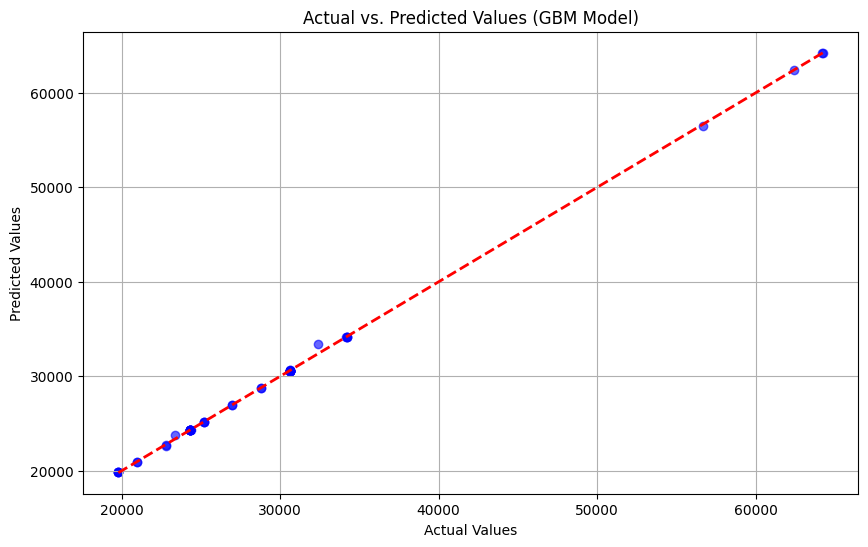

In [57]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gbm_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (GBM Model)')
plt.grid(True)
plt.show()


In [58]:
0# Save the trained model to a file
joblib.dump(gbm_model, 'clock_model_gbm.pkl')

['clock_model_gbm.pkl']

In [59]:
# Define a function to recommend optimal alarm time with additional insights
def recommend_alarm(day_of_week, time_of_day, HourOfAlarm, MinuteOfAlarm, model):
    input_data = [[day_of_week, time_of_day, 0.25, 0.25, HourOfAlarm, MinuteOfAlarm, 0, 4, 800]]  # Dummy values for snooze ratio, alarm dismissed ratio, and duration of alarm
    predicted_seconds = model.predict(input_data)[0]
    hours = int(predicted_seconds // 3600)
    minutes = int((predicted_seconds % 3600) // 60)

     # Additional insights based on recommended alarm time
    if hours > 0 and hours < 4:
        recommendation_text = f"Recommended alarm time: {hours}:{minutes:02d} (Night recommendation)"
    elif hours > 4 and hours < 11:
        recommendation_text = f"Recommended alarm time: {hours}:{minutes:02d} (Morning recommendation)"
    elif hours > 11 and hours < 16:
        recommendation_text = f"Recommended alarm time: {hours}:{minutes:02d} (Afternoon recommendation)"
    elif hours > 16 and hours < 19:
        recommendation_text = f"Recommended alarm time: {hours}:{minutes:02d} (Evening recommendation)"
    else:
        recommendation_text = f"Recommended alarm time: {hours}:{minutes:02d} (Night recommendation)"

    return recommendation_text


# Function to get user input for day of the week
def get_day_input():
    while True:
        try:
            day_input = int(input("Enter a number (0-6) representing the day of the week (0 for Monday , 2 for Tuesday, ..., 6 for Sunday): "))
            if 0 <= day_input <= 6:
                return day_input
            else:
                print("Invalid input! Please enter a number between 0 and 6.")
        except ValueError:
            print("Invalid input! Please enter a valid number.")

# Function to get user input for time of day
def get_time_input():
    while True:
        try:
            time_input = int(input("Enter a number representing the time of day (0 for Morning, 1 for Afternoon, 2 for Evening, 3 for Evening: "))
            if 0 <= time_input <= 3:
                return time_input
            else:
                print("Invalid input! Please enter a number between 0 and 4.")
        except ValueError:
            print("Invalid input! Please enter a valid number.")

# Example usage of the recommendation function with user inputs
while True:
    day_of_week_input = get_day_input()
    time_of_day_input = get_time_input()
    HourOfAlarm = int(input("Enter the hour of your current alarm time (0-23): "))
    MinuteOfAlarm = int(input("Enter the minute of your current alarm time (0-59): "))

    recommendation = recommend_alarm(day_of_week_input, time_of_day_input, HourOfAlarm, MinuteOfAlarm, gbm_model)
    print(recommendation)

    try_again = input("Do you want to try another recommendation? (yes/no): ")
    if try_again.lower() != 'yes':
        break


Enter a number (0-6) representing the day of the week (0 for Monday , 2 for Tuesday, ..., 6 for Sunday): 0
Enter a number representing the time of day (0 for Morning, 1 for Afternoon, 2 for Evening, 3 for Evening: 0
Enter the hour of your current alarm time (0-23): 7
Enter the minute of your current alarm time (0-59): 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Recommended alarm time: 7:00 (Morning recommendation)
Do you want to try another recommendation? (yes/no): no
